In [266]:
# Modules and Packages for Data Analysis
import numpy as np  # deal with number arrays
import pandas as pd  # make a nice data frame, have column, index, easily viewing

from sklearn import svm
from sklearn import preprocessing

# Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)  # more features, uses and control

# make plot figures in the browser, no pop up figures
%matplotlib inline 

In [284]:
recipes = pd.read_csv("Cupcakes vs Muffins.csv")  # the file has to be in the same folder or add path 
# have 9 serises
recipes.head(n=3)
print(recipes.shape)
print(recipes.head())  # only read the first 5 lines data

(20, 9)
     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


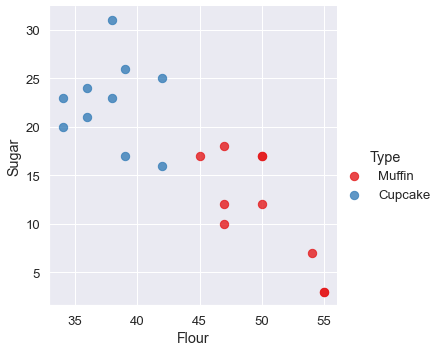

In [268]:
# Plot Data
sns.lmplot(x="Flour", y="Sugar", data=recipes, hue="Type", 
          palette="Set1", fit_reg=False, scatter_kws={"s": 70});  # need to specify x and y parameters

In [269]:
# Format and Pre-process Data
type_label = np.where(recipes["Type"]=="Muffin", 0, 1)
recipe_features = recipes.columns.values[1:].tolist()  # seclete the first row and make it as a string list
recipe_features
# ingredients = recipes[recipe_features].values  # all data
ingredients = recipes[["Flour", "Sugar"]].values
# print(ingredients)
# print(recipes["Type"].values)
# print(type_label)

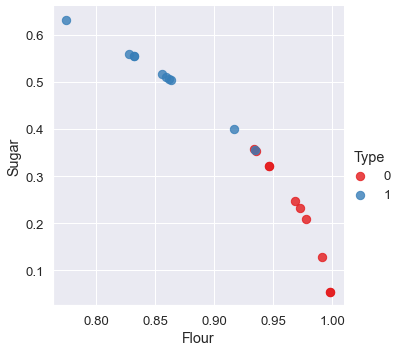

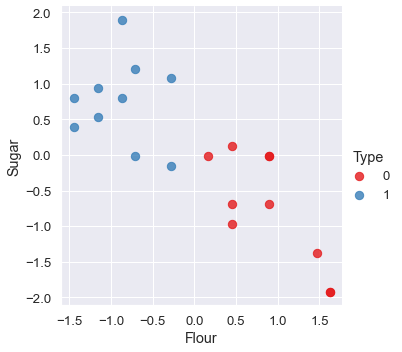

In [270]:
# problem: need Data Preprocess: Standardization or Normalization
# from sklearn.preprocessing import StandardScaler
# ingredients_normalize = preprocessing.normalize(recipes[recipe_features].values)
ingredients_normalize = preprocessing.normalize(recipes[["Flour", "Sugar"]].values, norm='l2')
# print(ingredients_normalize)
ingredients_scale = preprocessing.scale(recipes[["Flour", "Sugar"]].values)
# print(ingredients_scale)
# print(recipes[["Flour", "Sugar"]].values)
# print(np.array([type_label]))

recipes_normalize= pd.DataFrame(ingredients_normalize,
                   columns=["Flour", "Sugar"])
recipes_normalize.insert(0,"Type",type_label)

recipes_scale= pd.DataFrame(ingredients_scale,
                   columns=["Flour", "Sugar"])
recipes_scale.insert(0,"Type",type_label)
# print(recipes_normalize)
# print(recipes_scale)

sns.lmplot(x="Flour", y="Sugar", data=recipes_normalize, hue="Type", 
          palette="Set1", fit_reg=False, scatter_kws={"s": 70});

sns.lmplot(x="Flour", y="Sugar", data=recipes_scale, hue="Type", 
          palette="Set1", fit_reg=False, scatter_kws={"s": 70});


In [271]:
# Fit Model
# svm.SVR: Support Vector Regression
# svm.SVC: Support Vector Classification
model = svm.SVC(kernel="linear")  
model.fit(ingredients, type_label)
model_2 = svm.SVC(kernel="linear")  
model_2.fit(ingredients_normalize, type_label)
model_3 = svm.SVC(kernel="linear")  
model_3.fit(ingredients_scale, type_label)

SVC(kernel='linear')

-857617921181269.4
-3.7306484861020344e+16


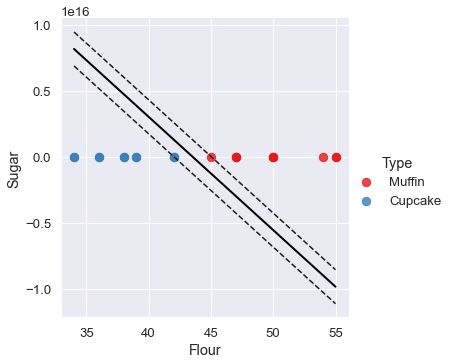

In [272]:
# get the Separating Hyperplane
w = model.coef_[0]
a = -w[0] / w[1]  # generate the slope


# xx = np.linspace(30, 60)  # x(flour) is in the interval 30~60
xx = np.linspace(np.amin(ingredients, axis=0)[0], np.amax(ingredients, axis=0)[0])  # get min/maximum of an array


b = (model.intercept_[0] / w[1])  #
yy = a * xx - b

# Plot the parallels to the separating hyperplane that pass through the support vectors
b_down = model.support_vectors_[0]
yy_down = a * xx + (b_down[1] - a * b_down[0])
b_up = model.support_vectors_[-1]
yy_up = a * xx + (b_up[1] - a * b_up[0])

sns.lmplot(x="Flour", y="Sugar", data=recipes, hue="Type", 
          palette="Set1", fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color="black")  # seaborn can sit on the top of plt.plot
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
print(a)
print(b)

In [273]:
# normalizer = preprocessing.Normalizer().fit(ingredients_scale)
# # get the Separating Hyperplane
# w = model_2.coef_[0]
# a = -w[0] / w[1]  # generate the slope


# # xx = np.linspace(30, 60)  # x(flour) is in the interval 30~60
# xx = np.linspace(np.amin(ingredients_normalize, axis=0)[0], np.amax(ingredients_normalize, axis=0)[0])  # get min/maximum of an array


# b = (model_2.intercept_[0] / w[1])  #
# yy = a * xx - b

# print(a)
# print(b)

# # Plot the parallels to the separating hyperplane that pass through the support vectors
# b_down = model_2.support_vectors_[0]
# yy_down = a * xx + (b_down[1] - a * b_down[0])
# b_up = model_2.support_vectors_[-1]
# yy_up = a * xx + (b_up[1] - a * b_up[0])

# sns.lmplot(x="Flour", y="Sugar", data=recipes_normalize, hue="Type", 
#           palette="Set1", fit_reg=False, scatter_kws={"s": 70});
# plt.plot(xx, yy, linewidth=2, color="black")  # seaborn can sit on the top of plt.plot
# plt.plot(xx, yy_down, 'k--')
# plt.plot(xx, yy_up, 'k--')


2.481039429702028
0.027197793031352807


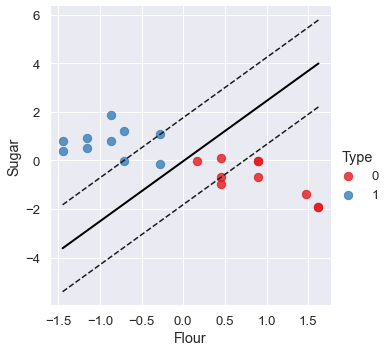

In [274]:
 scaler = preprocessing.StandardScaler().fit(ingredients)
# get the Separating Hyperplane
w = model_3.coef_[0]
a = -w[0] / w[1]  # generate the slope


# xx = np.linspace(30, 60)  # x(flour) is in the interval 30~60
xx = np.linspace(np.amin(ingredients_scale, axis=0)[0], np.amax(ingredients_scale, axis=0)[0])  # get min/maximum of an array


b = (model_3.intercept_[0] / w[1])  #
yy = a * xx - b

print(a)
print(b)

# Plot the parallels to the separating hyperplane that pass through the support vectors
b_down = model_3.support_vectors_[0]
yy_down = a * xx + (b_down[1] - a * b_down[0])
b_up = model_3.support_vectors_[-1]
yy_up = a * xx + (b_up[1] - a * b_up[0])

sns.lmplot(x="Flour", y="Sugar", data=recipes_scale, hue="Type", 
          palette="Set1", fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color="black")  # seaborn can sit on the top of plt.plot
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

In [275]:
# # Create a function to predict muffin or cupcake
# def muffin_or_cupcake(flour, sugar):
#     if(model.predict([[flour, sugar]])) == 0:
#         print("You\'re looking at a muffin recipe!")
#     else:
#         print("You\'re looking at a muffin recipe!")
        

# # predict 
# muffin_or_cupcake(50, 20)
# # plot the result
# sns.lmplot(x="Flour", y="Sugar", data=recipes, hue="Type", 
#           palette="Set1", fit_reg=False, scatter_kws={"s": 70});
# plt.plot(xx, yy, linewidth=2, color="black")
# plt.plot(50,20, 'yo', markersize='9')

[[0.89177093 0.39467656]]


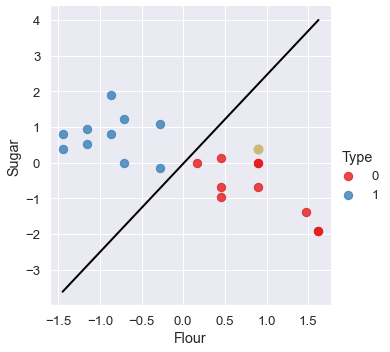

In [276]:
# plot the result
sns.lmplot(x="Flour", y="Sugar", data=recipes_scale, hue="Type", 
          palette="Set1", fit_reg=False, scatter_kws={"s": 70});
plt.plot(xx, yy, linewidth=2, color="black")

pred_data = scaler.transform([[50,20]])   
print(pred_data)
plt.plot(pred_data[0][0], pred_data[0][1], 'yo', markersize='9')